<img src="../src/packt-banner.png" alt="">

# Lesson 1: Jupyter Fundamentals

In this workbook you will find:
- Useful Jupyter Notebook features
- Introductions to the Python libraries we'll use
- An exploratory data analysis

---

## Topic A: Basic functionality and features

We include examples of useful notebook features such as getting help, using tab, and Jupyter's magic functions.

---

### Subtopic C: Jupyter Features    

---

#### Basic Keyboard Shortcuts
- `Shift + Enter` to run cell
- `Escape` to leave cell
- `a` to add a cell above
- `b` to add a cell below
- `dd` to delete a cell
- `m` to change cell to Markdown (after pressing escape)
- `y` to change cell to Code (after pressing escape)
- Arrow keys move cells (after pressing escape)
- `Enter` to enter cell   


---

#### Getting Help
- add question mark to end of object

In [ ]:
# Get the numpy arange docstring
import numpy as np
np.arange?

In [ ]:
# Get the python sort function docstring
sorted?

---

#### Tab Completion

Example of Jupyter tab completion include:
- listing available modules on import   
`import <tab>`   
`from numpy import <tab>`
- listing available modules after import         
`np.<tab>`   
- function completion    
`np.ar<tab>`   
`sor<tab>([2, 3, 1])`   
- variable completion    
`myvar_1 = 5`   
`myvar_2 = 6`   
`my<tab>`   
- listing relative path directory contents   
`../<tab>`   
(then press enter on a folder and tab again to show its contents)

---

#### Jupyter Magic Functions
List of the available magic commands:

In [ ]:
%lsmagic

---

In [ ]:
# Display plots inline
%matplotlib inline

---
**Timers**

In [ ]:
a = [1, 2, 3, 4, 5] * int(1e5)

In [ ]:
%%time
# Get runtime for the entire cell

for i in range(len(a)):
    a[i] += 5

In [ ]:
# Get runtime for one line
%time a = [_a + 5 for _a in a]

In [ ]:
# Average results of many runs
%timeit set(a)

---

**Using bash in the notebook**

Note: this section may not load on Windows machines unless you have configured your shell environment in Jupyter.

If you're getting errors, then you may find one of the following solutions helpful:

[a)](https://github.com/jupyter/help/issues/181) Open up git bash, navigate to the source code and start Jupyter from there with `jupyter notebook`.

OR

[b)](https://medium.com/@konpat/using-git-bash-in-jupyter-noteobok-on-windows-c88d2c3c7b07) Try to point Jupyter towards the git shell by adding the following code (or similar for your system) to `~/.jupyter/jupyter_notebook_config.py`:

```
c.NotebookApp.terminado_settings = {
    'shell_command': ['C:\\Program Files\\Git\\bin\\bash.exe']
}

```

In [ ]:
%%bash

echo "using bash from inside Jupyter!" > test-file.txt
ls
echo ""
cat test-file.txt
rm test-file.txt

In [ ]:
%ls

In [ ]:
%%bash
pwd

---
**External magic functions**   
Note: these can be installed with pip by doing "pip install package_name"

In [ ]:
# Source: https://github.com/catherinedevlin/ipython-sql
# do pip install ipython-sql in the terminal
%load_ext sql

In [ ]:
%%sql sqlite://

SELECT *
FROM (
    SELECT 'Hello' as msg_1
) A JOIN (
    SELECT 'World!' as msg_2
) B;

---
Document versions for reproducability and datestamp the notebook

In [ ]:
# pip install version_information
# https://github.com/jrjohansson/version_information
#
# alternate option: https://github.com/rasbt/watermark

%load_ext version_information
%version_information requests, numpy, pandas, matplotlib, seaborn, sklearn

---

### Subtopic D: Python Libraries   

---

In [ ]:
# Common standard libraries

import datetime
import time
import os

In [ ]:
# Common external libraries

import pandas as pd
import numpy as np
import sklearn # scikit-learn
import requests
from bs4 import BeautifulSoup

In [ ]:
# Visualization libraries

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Setting plot appearance
# See here for more options: https://matplotlib.org/users/customizing.html

%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")
# sns.set_context("poster", font_scale=1.0)

In [ ]:
# Ignore warnings (don't display stderr)

# import warnings
# warnings.filterwarnings('ignore')

---

## Topic B: Our first Analysis: the Boston Housing Dataset   
We explore the Boston housing dataset, which contains US census data concerning houses in various areas around the city of Boston.

---

### Subtopic A: Loading the data

---

In [ ]:
from sklearn import datasets
boston = datasets.load_boston()

In [ ]:
type(boston)

In [ ]:
from sklearn.utils import Bunch
Bunch?

In [ ]:
# What fields are in the dictionary?
boston.keys()

In [ ]:
print(boston['DESCR'])

In [ ]:
import pandas as pd
pd.DataFrame?

In [ ]:
# What does the data look like?
boston['data']

In [ ]:
boston['data'].shape

In [ ]:
boston['feature_names']

In [ ]:
# Load the data
df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])

In [ ]:
# Still need to add the target variable
boston['target'].shape

In [ ]:
df['MEDV'] = boston['target']

In [ ]:
# Move the target variable to the front of the table
y = df.MEDV.copy()
del df['MEDV']
df = pd.concat((y, df), axis=1)

In [ ]:
df.head()

In [ ]:
df.tail(10)

In [ ]:
len(df)

In [ ]:
df.dtypes

In [ ]:
# Identify and NaNs
df.isnull().sum()

In [ ]:
# Removing some columns
for col in ['ZN', 'NOX', 'RAD', 'PTRATIO', 'B']:
    del df[col]

---

### Subtopic B: Data exploration    

---

In [ ]:
df.describe().T

In [ ]:
# Focus on these columns
cols = ['RM', 'AGE', 'TAX', 'LSTAT', 'MEDV']

In [ ]:
# Subset
df[cols].tail()

In [ ]:
# The pairwise correlations
df[cols].corr()

In [ ]:
# Set up plotting environment

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Setting plot appearance
%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")

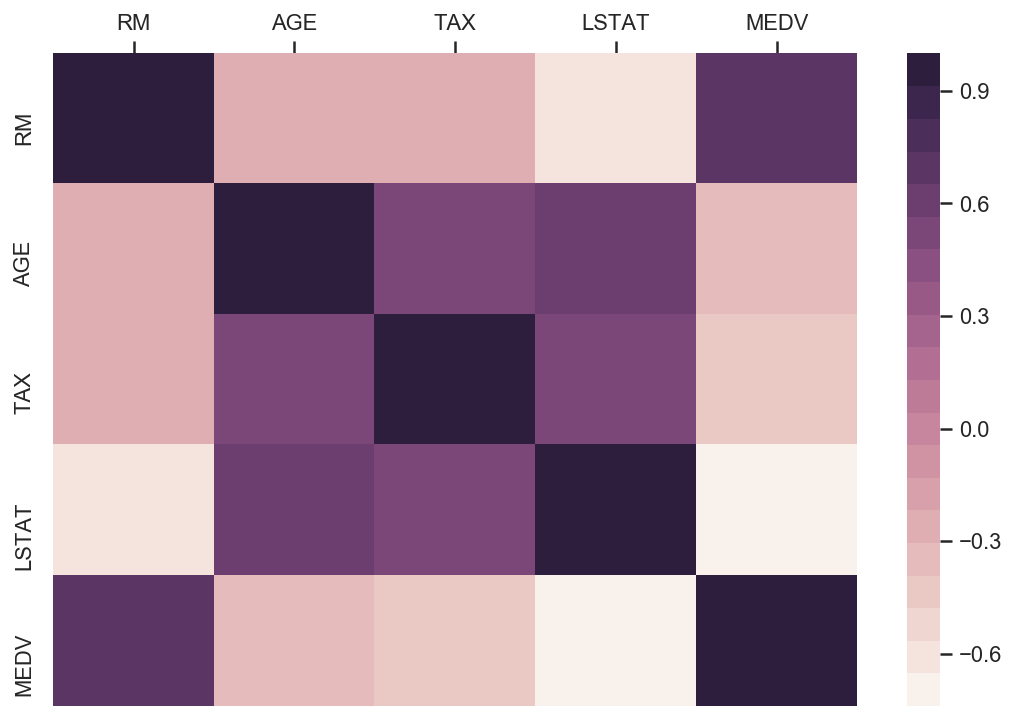

In [71]:
# Pairwise correlation heatmap

ax = sns.heatmap(df[cols].corr(),
                 cmap=sns.cubehelix_palette(20, light=0.95, dark=0.15))
ax.xaxis.tick_top() # move labels to the top

plt.savefig('lesson-1-boston-housing-corr.png',
            bbox_inches='tight', dpi=300)

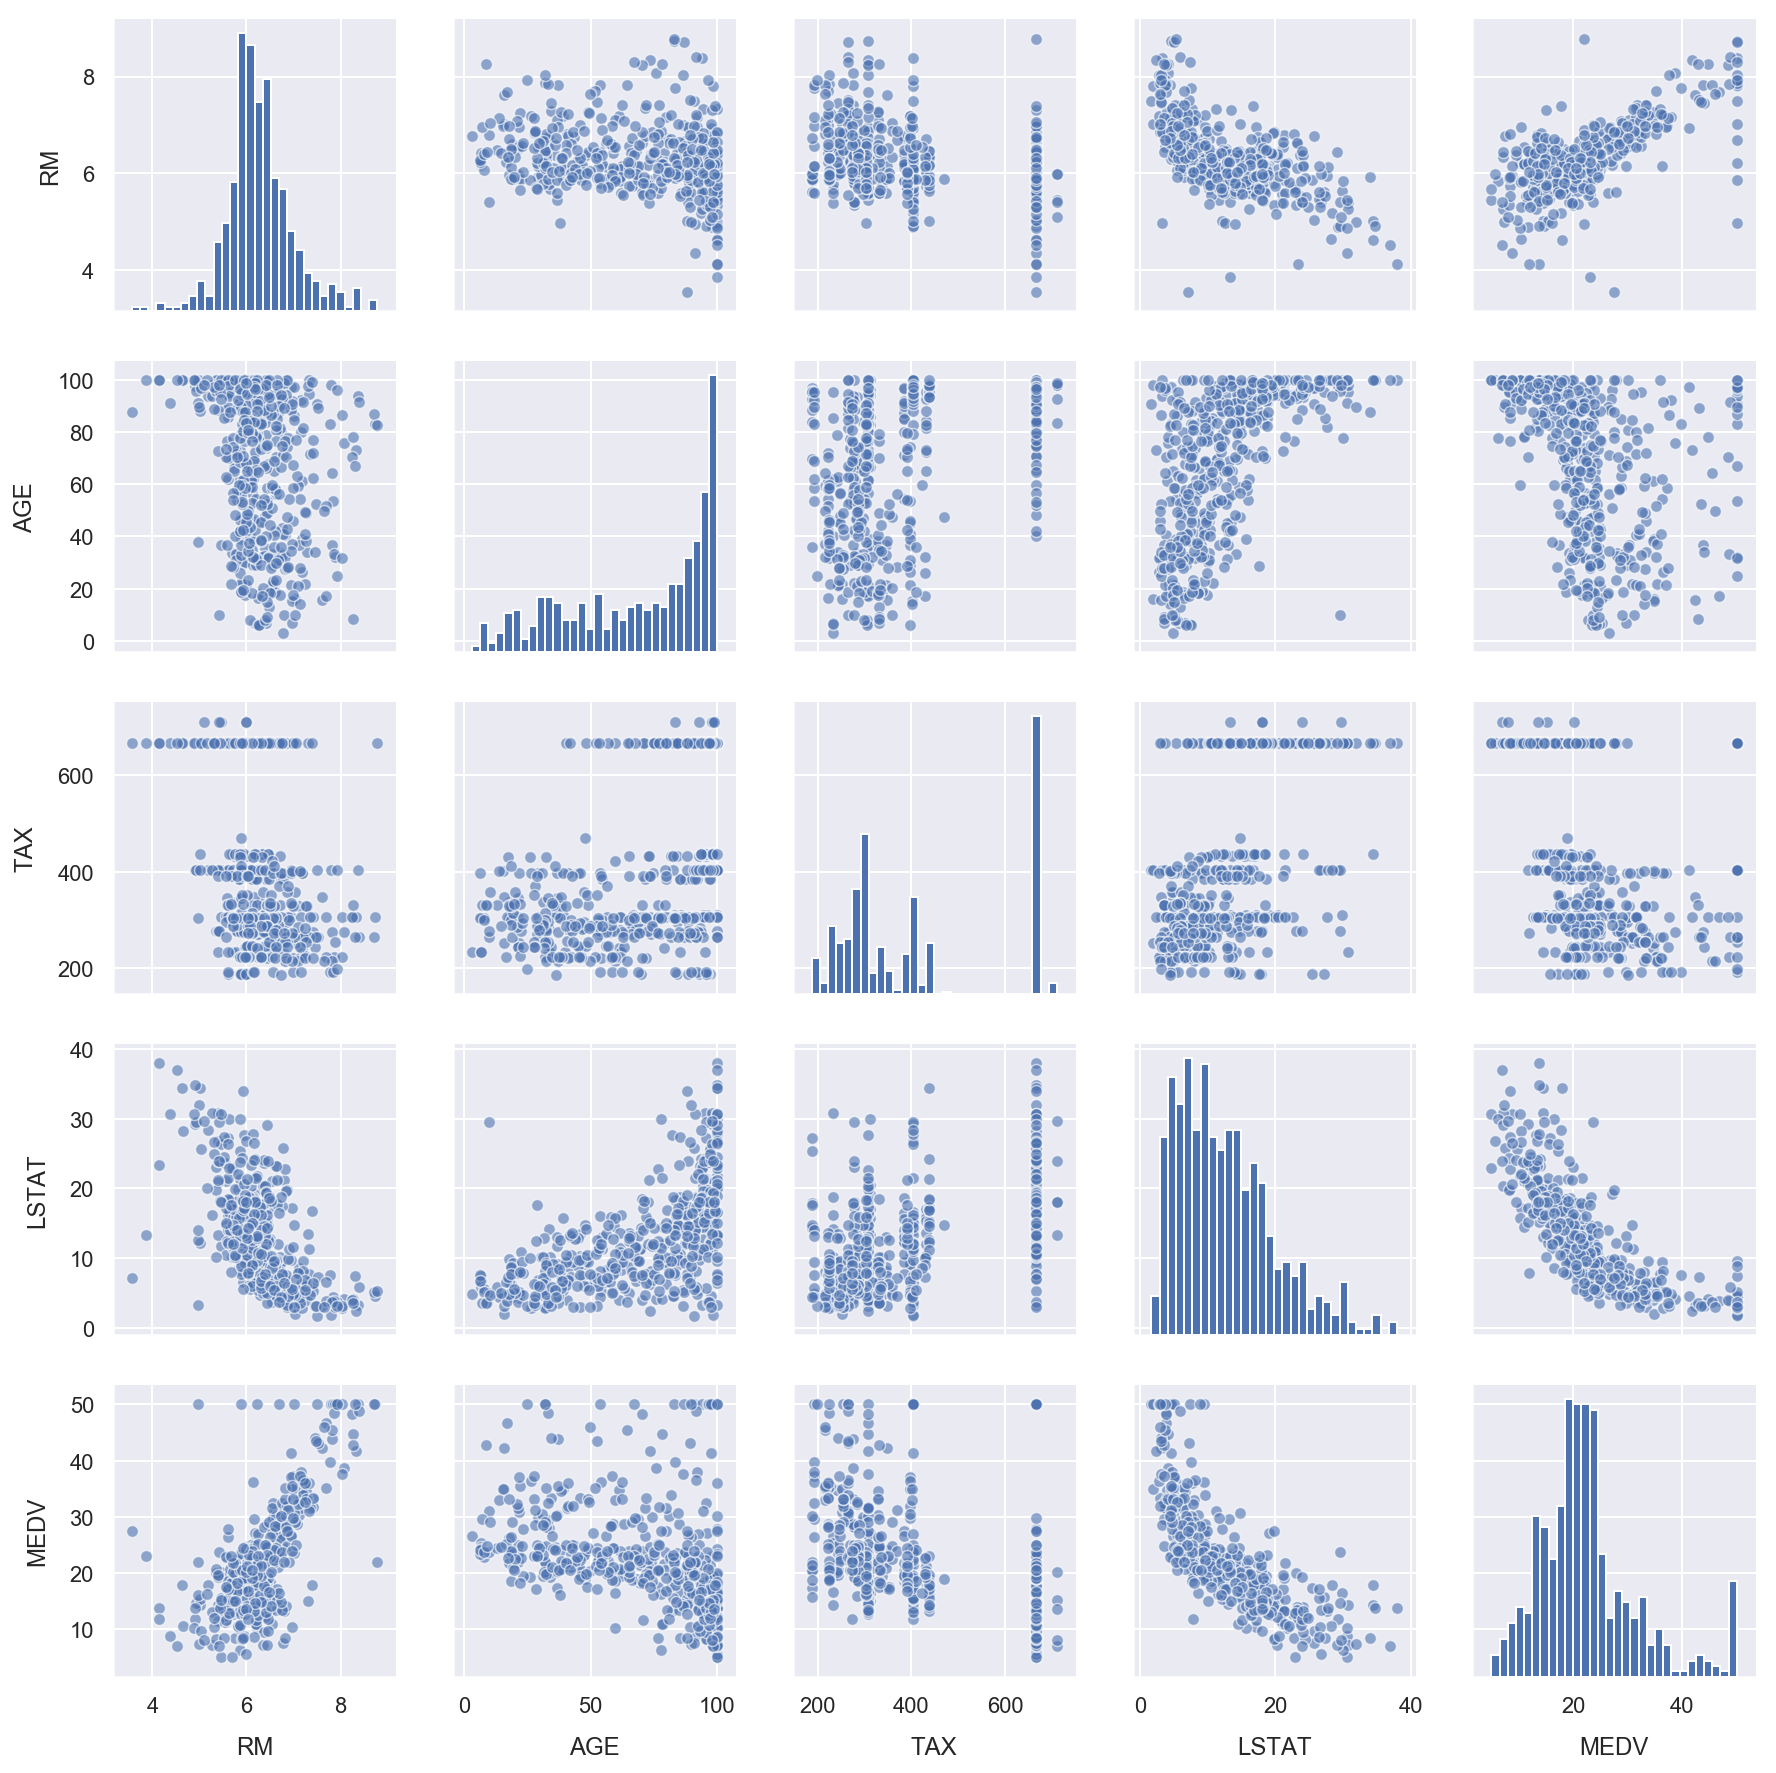

In [72]:
sns.pairplot(df[cols],
             plot_kws={'alpha': 0.6},
             diag_kws={'bins': 30})

plt.savefig('lesson-1-boston-housing-pairplot.png',
            bbox_inches='tight', dpi=300)

---

### Subtopic C: Introduction to predictive analytics   

---

In [ ]:
sns.regplot?

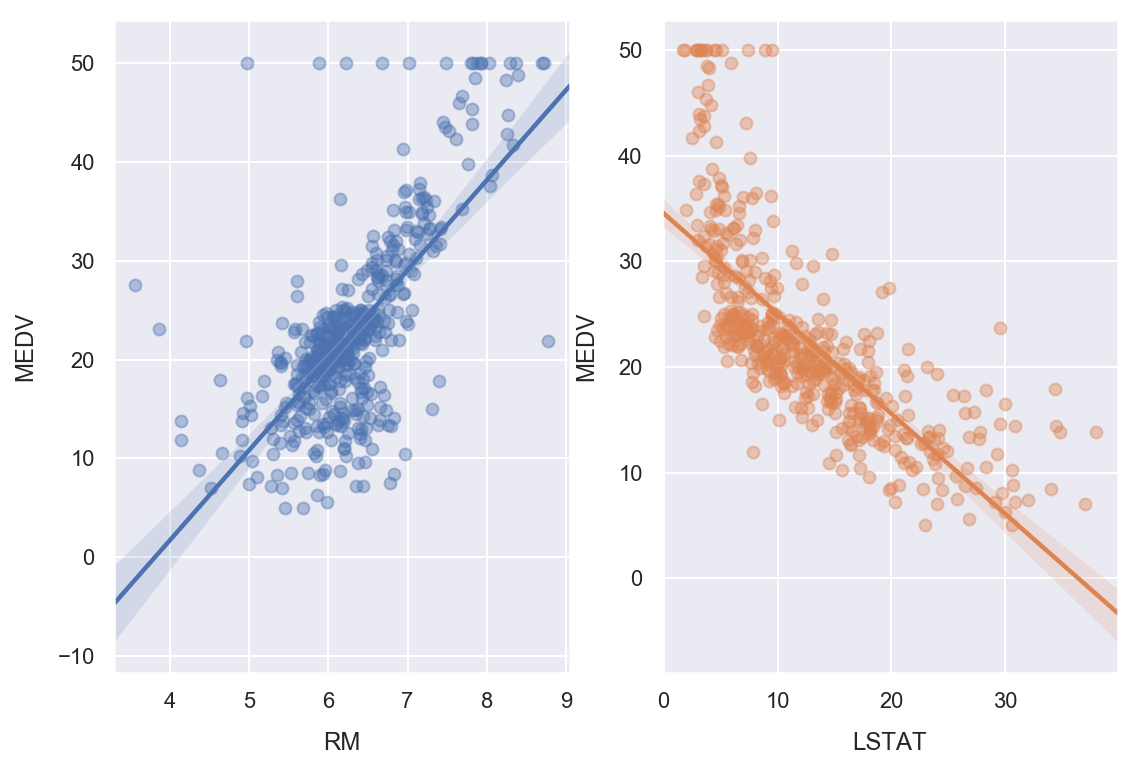

In [73]:
# Modeling MADV as a function of RM and LSTAT

fig, ax = plt.subplots(1, 2)
sns.regplot('RM', 'MEDV', df, ax=ax[0], scatter_kws={'alpha': 0.4})
sns.regplot('LSTAT', 'MEDV', df, ax=ax[1], scatter_kws={'alpha': 0.4})
plt.savefig('lesson-1-boston-housing-scatter.png',
            bbox_inches='tight', dpi=300)

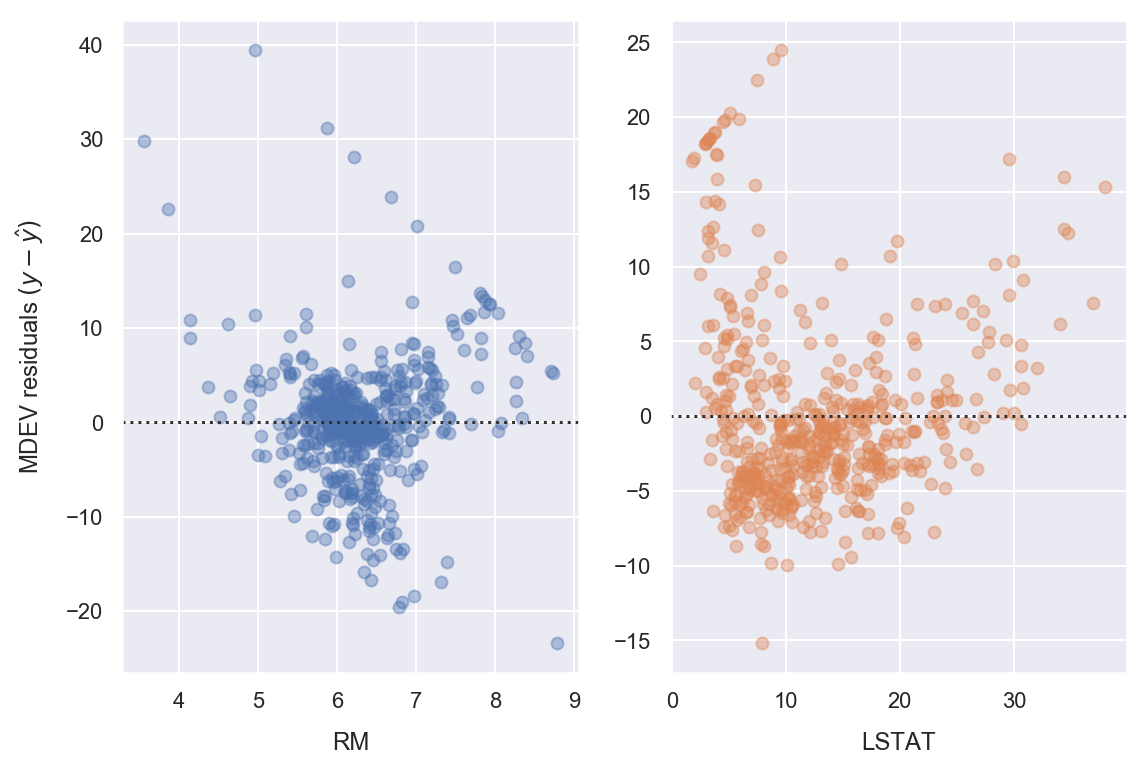

In [74]:
# Residual plots

fig, ax = plt.subplots(1, 2)
ax[0] = sns.residplot('RM', 'MEDV', df, ax=ax[0], scatter_kws={'alpha': 0.4})
ax[0].set_ylabel('MDEV residuals $(y-\hat{y})$')
ax[1] = sns.residplot('LSTAT', 'MEDV', df, ax=ax[1], scatter_kws={'alpha': 0.4})
ax[1].set_ylabel('')
plt.savefig('lesson-1-boston-housing-residuals.png',
            bbox_inches='tight', dpi=300)

In [ ]:
# MSE of linear models

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def get_mse(df, feature, target='MEDV'):
    # Get x, y to model
    y = df[target].values
    x = df[feature].values.reshape(-1,1)
    print('{} ~ {}'.format(target, feature))
    
    # Build and fit the model
    lm = LinearRegression()
    lm.fit(x, y)
    msg = 'model: y = {:.3f} + {:.3f}x'\
            .format(lm.intercept_, lm.coef_[0])
    print(msg)
    
    # Predict and determine MSE
    y_pred = lm.predict(x)
    error = mean_squared_error(y, y_pred)
    print('mse = {:.2f}'.format(error))
    print()

In [ ]:
get_mse(df, 'RM')
get_mse(df, 'LSTAT')

---

#### Activity   
Fit a polynomial regression model

---
_Note: If desired, the following code can be removed from the student version of the notebook and replaced with empty cells._

In [ ]:
y = df['MEDV'].values
x = df['LSTAT'].values.reshape(-1,1)
print('x =')
print(x[:3], '...etc')

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)

In [ ]:
poly

In [ ]:
x_poly = poly.fit_transform(x)
print('x_poly =')
print(x_poly[:3], '...etc')

In [ ]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x_poly, y)

In [ ]:
x_0 = clf.intercept_ + clf.coef_[0] # intercept
x_1, x_2, x_3 = clf.coef_[1:]       # other coefficients
msg = 'model: y = {:.3f} + {:.3f}x + {:.3f}x^2 + {:.3f}x^3'\
        .format(x_0, x_1, x_2, x_3)
print(msg)

In [ ]:
y_pred = clf.predict(x_poly)
resid_MEDV = y - y_pred
print('residuals =')
print(resid_MEDV[:10], '...etc')

In [ ]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(y, y_pred)
print('mse = {:.2f}'.format(error))

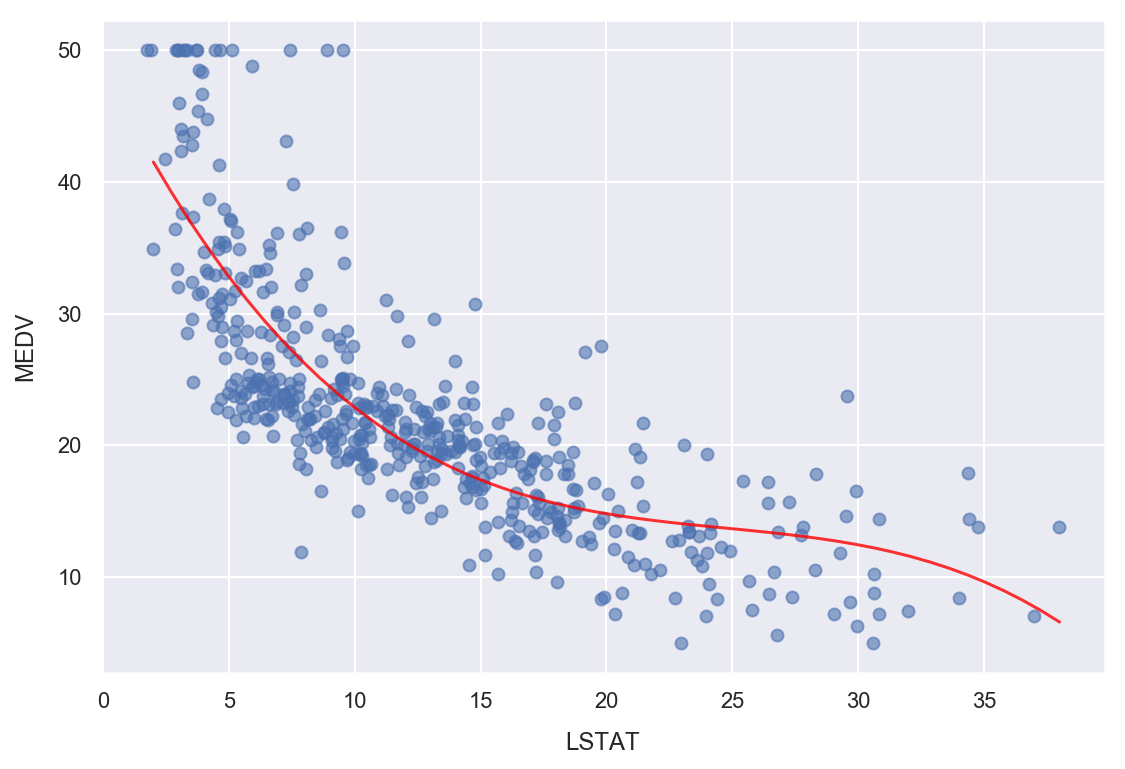

In [75]:
fig, ax = plt.subplots()

# Plot the samples
ax.scatter(x.flatten(), y, alpha=0.6)

# Plot the polynomial model
x_ = np.linspace(2, 38, 50).reshape(-1, 1)
x_poly = poly.fit_transform(x_)
y_ = clf.predict(x_poly)
ax.plot(x_, y_, color='red', alpha=0.8)

ax.set_xlabel('LSTAT'); ax.set_ylabel('MEDV')

plt.savefig('lesson-1-boston-housing-poly.png',
            bbox_inches='tight', dpi=300)

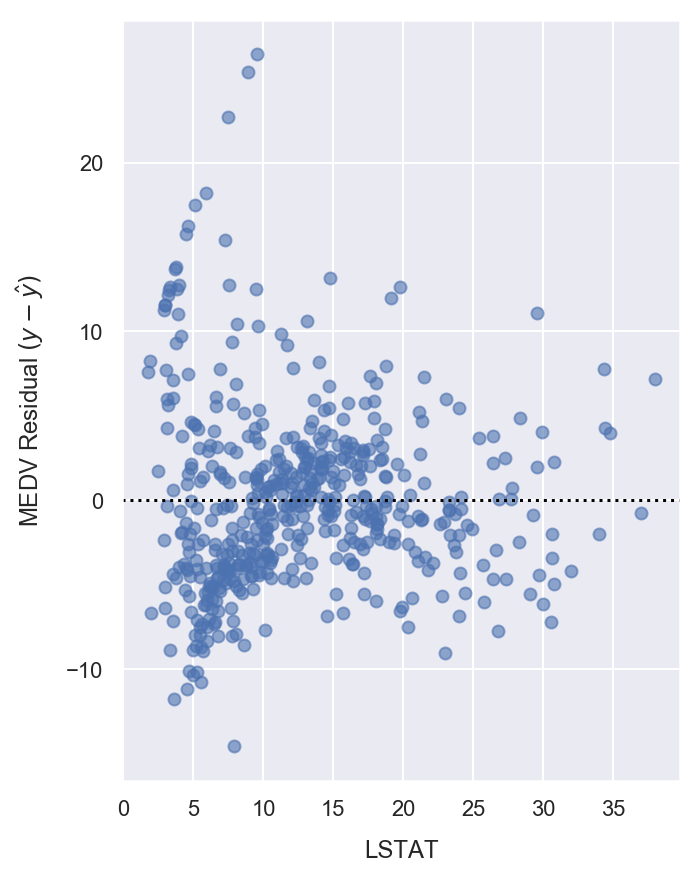

In [76]:
fig, ax = plt.subplots(figsize=(5, 7))
ax.scatter(x, resid_MEDV, alpha=0.6)
ax.set_xlabel('LSTAT')
ax.set_ylabel('MEDV Residual $(y-\hat{y})$')
plt.axhline(0, color='black', ls='dotted')
plt.savefig('lesson-1-boston-housing-poly-residuals.png',
            bbox_inches='tight', dpi=300)

---

### Subtopic D: Building and exploring categorical features     

---

#### Activity
Creating categorical fields from continuous variables and making segmented visualizations

---
_Note: If desired, the following code can be removed from the student version of the notebook and replaced with empty cells._

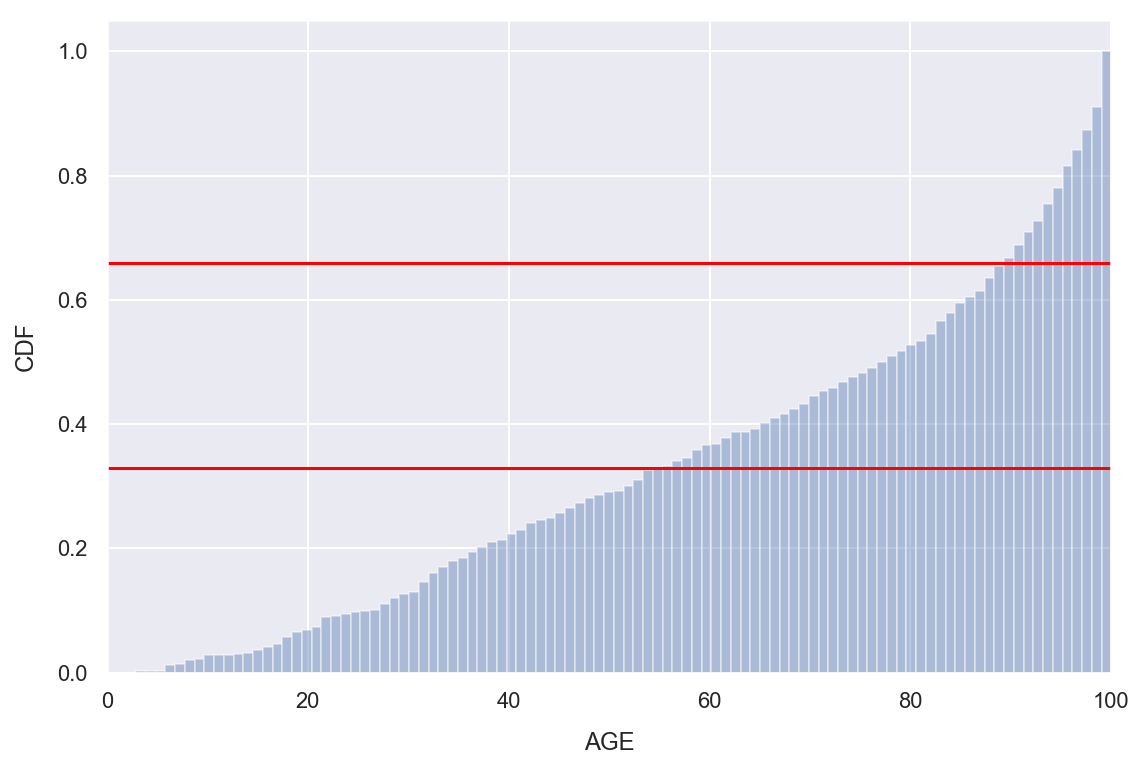

In [77]:
# Plot cumulative distribution to find places to split data

sns.distplot(df.AGE.values, bins=100, hist_kws={'cumulative': True}, kde_kws={'lw': 0})
plt.xlabel('AGE')
plt.ylabel('CDF')
plt.axhline(0.33, color='red')
plt.axhline(0.66, color='red')
plt.xlim(0, df.AGE.max())
plt.savefig('lesson-1-boston-housing-age-cdf.png',
            bbox_inches='tight', dpi=300)

In [ ]:
# Categorize AGE into 3 bins

def get_age_category(x):
    if x < 50:
        return 'Relatively New'
    elif 50 <= x < 85:
        return 'Relatively Old'
    else:
        return 'Very Old'

df['AGE_category'] = df.AGE.apply(get_age_category)

In [ ]:
# Check the segmented counts
df.groupby('AGE_category').size()

In [ ]:
# How is MEDV distributed for each age category

sns.violinplot(x='MEDV', y='AGE_category', data=df,
               order=['Relatively New', 'Relatively Old', 'Very Old'])
plt.xlim(0, 55)
plt.savefig('lesson-1-boston-housing-age-medv-violin.png',
            bbox_inches='tight', dpi=300)

In [ ]:
# Plotting the individual points

sns.violinplot(x='MEDV', y='AGE_category', data=df,
               order=['Relatively New', 'Relatively Old', 'Very Old'],
               inner='point')
plt.xlim(0, 55)
plt.savefig('lesson-1-boston-housing-age-medv-violin-points.png',
            bbox_inches='tight', dpi=300)

In [ ]:
# Color-segmented pair plot

cols = ['RM', 'AGE', 'TAX', 'LSTAT', 'MEDV', 'AGE_category']
sns.pairplot(df[cols], hue='AGE_category',
             hue_order=['Relatively New', 'Relatively Old', 'Very Old'],
             plot_kws={'alpha': 0.5})
plt.savefig('lesson-1-boston-housing-age-pairplot.png',
            bbox_inches='tight', dpi=300)

In [ ]:
# Look at LSTAT by segment in more detail

sns.violinplot(x='LSTAT', y='AGE_category', data=df,
               order=['Relatively New', 'Relatively Old', 'Very Old'])
plt.xlim(-5, 40)
plt.savefig('lesson-1-boston-housing-lstat-violin.png',
            bbox_inches='tight', dpi=300)